# Analysis of VTubers Sphere

## Content
+ <a href='#1.-Introduction.-What-is-VTuber?'>Introduction. What is VTuber?</a>

* <a href='#2.-Data-description'>Data description and objectives</a>

+ <a href='#3.-Data-cleaning-and-shaping'>Data cleaning and shaping</a>

+ <a href ='#4.-Data-Visualization'>Data Visualization</a>

+ <a href = '#5.-Conclusion'>Conclusion</a>

## [1. Introduction. What is VTuber?](#1.-Introduction.-What-is-VTuber?)

Virtual YouTubers, or VTubers, are online entertainers, who are typically Japanese-speaking YouTubers or live streamers. They use avatars created with programs such as Live2D, portraying characters designed by online artists. VTubers are associated with Japanese popular culture and aesthetics, such as anime and manga, and moe anthropomorphism with human or non-human traits. Some VTubers are anthropomorphic, non-human characters such as animals.

A VTuber's avatar is typically animated using a webcam and software, which captures the streamer's motions, expressions, and mouth movements, and maps them to a two- or three-dimensional model.

This project will provide the analysis of Vtubers to familiarize people with the brand new branch of the entertainment industry

<img src = 'https://animecorner.me/wp-content/uploads/2020/11/asdddsa.jpg.webp'>
    <img src = 'https://i.ytimg.com/vi/li7RoAL2e8w/maxresdefault.jpg'>


## [2. Data description](#2.-Data-description)

The data consists of several datasets: general information about youtube channel, superchat(youtube donation) stats and 3 files, consisting information, obtained by scraping websites (check <a href = 'https://github.com/yor1chi/EDA-of-VTubers-Sphere/blob/main/Web-Scraping.ipynb'>my web scraping file</a> for more detailed explanation)

#### 1) Channels - Contains general information about each VTuber

Number of observations - 909

channelId - Id of an youtube channel, wich is used to access channel page through url.

name - Name of a channel.

englishName - English name of channel. This column is used because VTubers' originates in Japan.

affiliation - membership of channel to a certain agency

subscriptionCount - Number of subscribers of the channel

videoCount - Number of videos on the channel

photo - Url of channel's profile picture

#### 2) Superchat stats - Contains general information about Superchat stats

Number of observations - 3353

channelId - Id of an youtube channel, wich is used to access channel page through url.

period - Time period of data acquisition

superChats - Number of superchats

uniqueSuperChatters	- Number of unique super chatters

totalSC - Total amount of superchats (JPY)

averageSC - Average amount of superchats (JPY)

totalMessageLength - Total superchat message length

averageMessageLength - Average superchat message length

mostFrequentCurrency - Most frequent donated currency

mostFrequentColor - Most frequent donation color. Used, because youtube superchats change their color depending on donated sum. Picture of significance table is related.

<img src = 'https://socialblade.com/blog/wp-content/uploads/2017/01/super-chat-incentives.png'>

#### 3) Superchats on particular month - Contains more detailed information about Superchats

Number of observations - 127,645

amount - Amount of donated money

currency - Description of currency type

significance - Superchat significance

channelId - Id of an youtube channel, wich is used to access channel page through url.

#### 4) Top revenue - Contains list of most profitable YouTube channels ever

Number of observations - 15

name - YouTube channel name

revenue - Total amount of superchatted money of all time

#### 5) Vtubers Date - Contains vast list of Vtubers and their registration date

Number of observations - 1997


name - Youtube channel name

registration date - Date of channel registration on the YouTube


#### 6) Hololive subscriber count - Contains a subscriber count of every hololive member split by time period, got from Mason Palmer

Vtuber - Vtuber name

Dates - list of dates, continuing up to the november 2021.







### Objectives




For this project, analysis and visualization consists of 5 parts:

1. <a href = '#4.1-How-popular-vtubers-are?'>How popular VTubers are?</a>

2. <a href = '#4.2-How-many-content-do-Vtubers-generate?'>How many content do they generate?</a>

3. <a href = '#4.3-How-profitable-is-it-to-be-a-VTuber?'>How profitable is it to be a VTuber?</a>

4. <a href ='#4.4-How-often-do-superchats-appear?'>How often do superchats appear?</a>

5. <a href = '#4.5-When-did-VTubers-become-that-popular?'>When did VTubers become that popular?</a>

## [3. Data cleaning and shaping](#3.-Data-cleaning-and-shaping)

Now we need to prepare and clean datasets:
* Replace null values by NaN
* Format dates
* Replace some columns

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
channels = pd.read_csv('Datasets/channels.csv')
vshojo_subs = pd.read_csv('Datasets/vshojo.csv')
top_revenue = pd.read_csv('Datasets/top_revenue.csv')
superchat_stats = pd.read_csv('Datasets/superchat_stats.csv')
superchat03 = pd.read_csv('Datasets/superchats_2021-03.csv')
superchat04 = pd.read_csv('Datasets/superchats_2021-04.csv')
superchat05 = pd.read_csv('Datasets/superchats_2021-05.csv')
superchat06 = pd.read_csv('Datasets/superchats_2021-06.csv')
superchat07 = pd.read_csv('Datasets/superchats_2021-07.csv')
superchat08 = pd.read_csv('Datasets/superchats_2021-08.csv')
superchat09 = pd.read_csv('Datasets/superchats_2021-09.csv')
superchat10 = pd.read_csv('Datasets/superchats_2021-10.csv')
vtubers_date = pd.read_csv('Datasets/vtubers_date.csv')

In [3]:
#drop unnecessary columns

channels = channels.drop(columns = {'photo'})
channels.head()

channelId                             name  \
0  UCJFZiqLMntJufDCHc6bQixg    hololive ホロライブ - VTuber Group   
1  UCfrWoRGlawPQDQxxeIDRP0Q               hololive Indonesia   
2  UCotXwY6s8pWmuWd_snKYjhg                 hololive English   
3  UCWsfcksUUpoEvhia0_ut0bA  holostars ホロスターズ - VTuber Group   
4  UCp6993wxpyDPHUpavwDFqgg               SoraCh. ときのそらチャンネル   

             englishName affiliation group  subscriptionCount  videoCount  
0  Hololive VTuber Group    Hololive   NaN            1450000         280  
1     Hololive Indonesia    Hololive   NaN             213000          39  
2       Hololive English    Hololive   NaN             354000          15  
3     Holostars Official    Hololive   NaN             105000          47  
4            Tokino Sora    Hololive   NaN             864000         484

In [4]:
#Convert string to the actual number and change names to match with initial dataset

vshojo_subs['subs'] = vshojo_subs['subs'].apply(lambda x: float(x.split()[:1][0].replace(',', '.')) * 1000)

vshojo_subs.name.replace({'HimeHajime': 'Hime Hajime', 'Apricot': 'Froot', 'ironmouse' : 'Ironmouse', 'Nyanners': 'Nyatasha Nyanners'}, inplace = True)
vshojo_subs.head()

name       subs
0     Projekt Melody   512500.0
1          Ironmouse   825100.0
2         Silvervale   237800.0
3  Nyatasha Nyanners  1690800.0
4        Hime Hajime   103400.0

In [5]:
# Convert revenue to amount of United States' Dollars

top_revenue['revenue'] = top_revenue.revenue.apply(lambda x: float(x.split()[-1].replace(',', ''))/433,24)
top_revenue.head()

name       revenue
0     Coco Ch. 桐生ココ  2.926259e+06
1  Rushia Ch. 潤羽るしあ  2.907549e+06
2  Pekora Ch. 兎田ぺこら  1.872192e+06
3  Marine Ch. 宝鐘マリン  1.676932e+06
4     Aqua Ch. 湊あくあ  1.471683e+06

In [6]:
#drop unnecessary columns and null rows


vtubers_date = vtubers_date.drop(columns = {'subs'})
vtubers_date = vtubers_date[vtubers_date['registration date'].notna()]
vtubers_date.head()

#there appeared to be 236 null rows

name registration date
0  Gawr Gura(がうるぐら サメちゃん)          Q3, 2020
1                   キズナアイ          Q4, 2016
2    Mori Calliope(森カリオペ)          Q3, 2020
3                   兎田ぺこら          Q3, 2019
4                   戌神ころね          Q1, 2019

In [7]:
# merge datasets
superchat03 = pd.merge(channels[['channelId', 'name', 'affiliation']], superchat03, on = 'channelId')
superchat04 = pd.merge(channels[['channelId', 'name', 'affiliation']], superchat04, on = 'channelId')
superchat05 = pd.merge(channels[['channelId', 'name', 'affiliation']], superchat05, on = 'channelId')
superchat06 = pd.merge(channels[['channelId', 'name', 'affiliation']], superchat06, on = 'channelId')
superchat07 = pd.merge(channels[['channelId', 'name', 'affiliation']], superchat07, on = 'channelId')
superchat08 = pd.merge(channels[['channelId', 'name', 'affiliation']], superchat08, on = 'channelId')
superchat09 = pd.merge(channels[['channelId', 'name', 'affiliation']], superchat09, on = 'channelId')
superchat10 = pd.merge(channels[['channelId', 'name', 'affiliation']], superchat10, on = 'channelId')

## [4. Data Visualization](#4.-Data-Visualization)

First of all, let's import our libraries, set plots and create formatting function to give our plots an appropriate appearance when it deals with large numbers.

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from ipywidgets import interact
import plotly.graph_objects as go
import plotly.express as px
from sklearn import linear_model


plt.rc('font', size = 16)
plt.rc('legend', fontsize = 16)
plt.rc('figure', figsize = (16, 9))
plt.style.use('fivethirtyeight')

In [9]:
def reformat_values(val, pos):
    if val >= 1000000000:
        val = round(val/1000000000)
        new_format = '{:}B'.format(val)
    elif val >= 1000000:
        val = round(val/1000000)
        new_format = '{:}M'.format(val)
    elif val >= 1000:
        val = round(val/1000)
        new_format = '{:}K'.format(val)
    elif val < 1000:
        new_format = round(val)
    else:
        new_format = val
            
    return new_format

In [10]:
def reformat_count(val):
    if val >= 1000000:
        val = round(val/1000000, 2)
        new_format = '{:}M'.format(val)
    elif val >= 1000:
        val = round(val/1000, 2)
        new_format = '{:}K'.format(val)
    elif val < 1000:
        new_format = round(val, 2)
    else:
        new_format = val
            
    return str(new_format)

In [11]:
def reformat_list(val_list, sign):
    new_val_list = []
    for val in val_list:
        if val >= 1000000:
            val = round(val/1000000, 2)
            val = sign + str(val)
            new_val = '{:}M'.format(val)
            new_val_list.append(str(new_val))
        elif val >= 1000:
            val = sign + str(val)
            val = round(val/1000, 2)
            new_val = '{:}K'.format(val)
            new_val_list.append(str(new_val))
        elif val < 1000:
            val = sign + str(val)
            new_val = round(val, 2)
            new_val_list.append(str(new_val))
        else:
            val = sign + str(val)
            new_val_list.append(str(val))
    return new_val_list

In [12]:
def currency_exchanger(amount, init_cur):
    c = CurrencyRates()
    return round(c.convert(init_cur, 'USD', amount), 2)


### [4.1 How popular vtubers are?](#4.1-How-popular-vtubers-are?)


Before building a graph, let's replace total subscription stats of VShojo agency. We need it because data from 'channels' dataframe was obtained from YouTube only, but VShojo is actually a twitch-based agency and that's why I decided to get VShojo statistics directly from twitch in order to fix their stats in this dataset. See more about data acquisition process in <a href = 'https://github.com/yor1chi/EDA-of-VTubers-Sphere/blob/main/Web-Scraping.ipynb'>Web Scraping file</a>

In [13]:
popularity = channels.groupby('affiliation').sum().drop('videoCount', axis = 1)
popularity = popularity.replace(popularity[popularity.index == 'VShojo']['subscriptionCount'][0], vshojo_subs.sum()[1])

popularity = popularity.sort_values('subscriptionCount', ascending=False).head()

popularity

subscriptionCount
affiliation                      
Hololive                 53688220
Nijisanji                37861440
Independents             35346370
Kizuna Ai Inc.            4577400
VShojo                    4515700

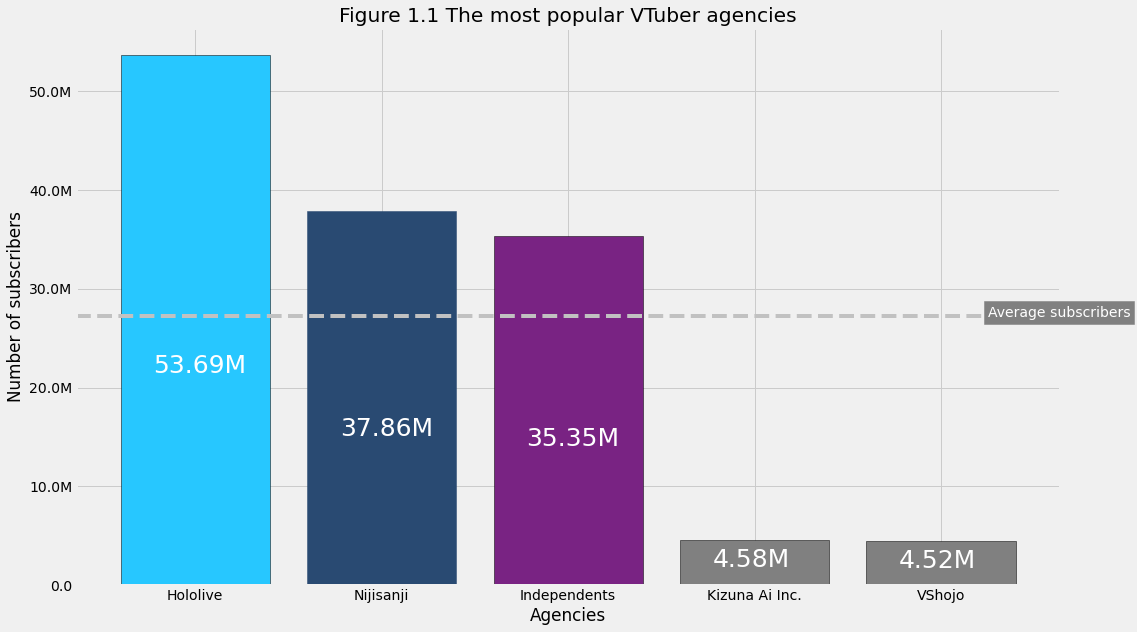

In [14]:
#value for plotting average line
mean_subs = popularity.mean()[0]

#Create condition to discolor bars below average line
above_aver = ['grey' if (x < mean_subs) else '#792383' for x in popularity['subscriptionCount']]

bars = plt.bar(popularity.index, popularity['subscriptionCount'], color = above_aver, edgecolor = 'black')

#Write bars' value inside of them
for i, v in enumerate(popularity['subscriptionCount']):
    plt.text(i-.225, 
              v/2.5, 
              reformat_count(v), 
              fontsize=25, 
              color='white')

#plot line with average subscribers count and write a label to it
plt.axhline(y = mean_subs, linestyle = '--', color = '#C1C1C1')
plt.text(
    x = 4.25,
    y=mean_subs,
    s="Average subscribers",
    backgroundcolor="grey",
    color = 'white',
    fontsize=14)

#Format y-axis
plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(reformat_values))

#Titles and labels
plt.xlabel('Agencies')
plt.ylabel('Number of subscribers')
plt.title('Figure 1.1 The most popular VTuber agencies')

#Color bars to give more attractive view
bars[0].set_color('#27c7ff')
bars[0].set_edgecolor('black')
bars[1].set_color('#294a72')

#fix spacing
plt.tight_layout()

plt.show()

Looking at the figure 1.1, we can observe huge domination of two giant agencies - Hololive and Nijisanji. But independent VTubers are also dominating over other agencies. Are streamers without an agency more popular than the rest? Let's dive into these three affiliations, compare their size and most popular talents

In [15]:
channels.groupby('affiliation').count()[['channelId']].sort_values('channelId', ascending = False).head(3)

channelId
affiliation            
Independents        323
Nijisanji           172
Hololive             70

Looking at the stats above we can easily answer question about independent VTubers - their popularity is due to their large number of streamers, which takes about 30% of whole dataset

In [16]:
#sort dataset to get only desired groups
best_talents = channels[(channels.affiliation == 'Hololive') | (channels.affiliation == 'Nijisanji')\
                        | (channels.affiliation == 'Independents')]

#create interactive function that will return certain plot
def best_rate(x):
    
    #Divide by color
    if x == 'Hololive':
        color = '#27c7ff'
    elif x == 'Nijisanji':
        color = '#294a72'
    else:
        color = '#792383'
    
    plt.figure(figsize = (18, 15))
    
    #take two columns with subscribers and channel name and then convert it to the list
    agency_best_talents = best_talents[best_talents.affiliation == x][['englishName', 'subscriptionCount']]\
    .sort_values('subscriptionCount', ascending=False).head(20).sort_values('subscriptionCount')
    talent_name = list(agency_best_talents['englishName'])
    talent_rate = list(agency_best_talents['subscriptionCount'])
    
    #create a horizontal bar plot with lists above
    plt.barh(talent_name, talent_rate, color = color, edgecolor = 'black')
    
    #assign bar values inside of them to show how many subs are there
    for i, v in enumerate(talent_rate):
        plt.text(v/100, i-.15, reformat_count(v), color='white', fontsize = 14, fontweight = 'demibold')
    
    #reformat x-axis to make more comfortable view
    plt.gca().xaxis.set_major_formatter(tick.FuncFormatter(reformat_values))
    
    #return plot
    plt.title('Figure 1.2 Top 20 most subscribed VTubers of the ' + x + ' agency')
    plt.tight_layout()
    return plt.show()

#activate interactive function
interact(best_rate, x = best_talents.affiliation.unique())

interactive(children=(Dropdown(description='x', options=('Hololive', 'Nijisanji', 'Independents'), value='Holo…

<function __main__.best_rate(x)>

Despite having much less talents than their closest rival, Hololive members appear to be more recognizable and more popular, than ones in the Nijisanji company. Taking this into account, it can be assumed that Hololive is the most popular agency in the world

### [4.2 How many content do Vtubers generate?](#4.2-How-many-content-do-Vtubers-generate?)

Let's analyze which virtual streaming agency do generate more content. Due to need in affiliation, we won't count independent VTubers.

In [17]:
#prepare data to be plotted
treemap_data = channels.dropna().groupby('englishName').agg({
    'subscriptionCount': 'first',
    'videoCount': 'first',
    'affiliation': 'first',
    'group': 'first',
    'name': 'first'
}).reset_index()

treemap_data

englishName  subscriptionCount  videoCount affiliation  \
0               Aadya              15100         177   Nijisanji   
1           Aiba Uiha             288000          83   Nijisanji   
2    Airani Iofifteen             467000         286    Hololive   
3       Aizono Manami             163000         440   Nijisanji   
4       Akabane Youko             163000         195   Nijisanji   
..                ...                ...         ...         ...   
315      Yuzuki Choco             743000         323    Hololive   
316      Yuzuki Reina             187000          24     Emoechi   
317        Yuzuki Roa             342000         364   Nijisanji   
318      ZEA Cornelia              81300         354   Nijisanji   
319       Zen Gunawan              94700         223       MAHA5   

                 group                                  name  
0             INACTIVE                   Aadya【NIJISANJI IN】  
1            Wave 2019               相羽ういは〖Aiba Uiha〗にじさんじ所属  
2    Indonesia 1st Gen  Airani Iofifteen Channel hololive-ID  
3            Wave 2019                   愛園 愛美/Aizono Manami  
4               Gamers                             赤羽葉子ちゃんねる  
..                 ...                                   ...  
315     2nd Generation                       Choco Ch. 癒月ちょこ  
316           INACTIVE                        Reina Official  
317          Wave 2019                       夢月ロア🌖Yuzuki Roa  
318       Nijisanji ID            ZEA Cornelia【NIJISANJI ID】  
319                 ID                    Zen Gunawan【MAHA5】  

[320 rows x 6 columns]

In [18]:
px.treemap(treemap_data, path = ['affiliation', 'group', 'name'], values = 'videoCount',
           width=1100, height=720, title = 'Figure 2 Treemap of generated content distribution at the platform')

In [19]:
treemap_data['videoCount'].sum()

112985

Once again, we can see dominance of Hololive and Nijisanji. They take about 3/4th of whole content field, but it's only due to their vast size. However, we can see that there are pretty much enough content to watch - about 110k videos

### [4.3 How profitable is it to be a VTuber?](#4.3-How-profitable-is-it-to-be-a-VTuber?)

YouTube does provide a superchat function. Superchat is a way for viewers to support their favorite YouTubers by sending them money and it's actually one of the most efficient way to earn money from YouTube.

We now know that VTubers are pretty popular and there is a massive amount of content to watch. But how about their income? Let's analyze it now.

In order to answer question above, I <a href = 'https://github.com/yor1chi/EDA-of-VTubers-Sphere/blob/main/Web-Scraping.ipynb'>obtained data</a> from <a href = 'https://playboard.co/en/'>Playboard</a>, which contains data about most superchatted (donated) channels EVER

In [20]:
color = ['pink' if i in list(channels['name']) else 'grey' for i in top_revenue['name']]
fig = go.Figure(go.Bar( x = top_revenue['name'],
        y = top_revenue['revenue'],
        marker={'color': color},
        text = reformat_list(top_revenue['revenue'], '$'),
        textposition = 'inside'))
fig.update_layout(title_text='Figure 3.1 Top 15 most superchatted YouTube channels ever')

Figure above shows that 12 out of 15 most superchatted YouTubers are VTubers and their maximal income is about 3 million dollars. Let's dive into superchats and see how many superchats and money do VTubers gain

In [21]:
frequent_currencies = superchat06.groupby('currency').count().sort_values('amount', ascending = False).head().index

In [32]:
superchat_list = [superchat03, superchat04, superchat05, superchat06, superchat07, superchat08, superchat09, superchat10]

def money_line(Affiliation, Currency):
    month = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
    money = []
    for i in superchat_list:
        money.append(i[(i['affiliation'] == Affiliation) & (i['currency'] == Currency)]['amount'].sum())
    
    
    plt.plot(month, money, color = '#27c7ff', marker = 'o')
    plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(reformat_values))
    plt.xlabel('Months')
    plt.ylabel('Amount of superchatted money')
    plt.annotate('*data was obtained in period of 03.2021 - 10.2021', (0,0), (700,-80), 
                 fontsize=15, xycoords='axes fraction', textcoords='offset points')
    
    for i,j in zip(month,money):
        plt.annotate((reformat_values(j, i)), xy = (i,j*1.02))

    plt.title('Figure 3. 2 Amount of supperchatted money to ' + Affiliation +' VTuber group (' + Currency + ')')
    return plt.show()

def money_bar(Currency, TimePeriod):
    month = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
    period = month.index(TimePeriod)
    
    sc_distrib = superchat_list[period][superchat_list[period].currency\
        == Currency].groupby(['affiliation']).sum().sort_values('amount', ascending = False).head()
    vtuber_groups = list(sc_distrib.index)
    money = list(sc_distrib['amount'])
    
    plt.bar(vtuber_groups, money, color = '#294a72', edgecolor = 'black')
    plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(reformat_values))
    for i, v in enumerate(money):
        plt.text(i-.175, 
              v/5, 
              reformat_count(v), 
              fontsize=15, 
              color='white', fontweight = 'semibold')
    
    plt.annotate('*data was obtained in period of 03.2021 - 10.2021', (0,0), (700,-80), 
                 fontsize=15, xycoords='axes fraction', textcoords='offset points')
    plt.xlabel('Agencies')
    plt.ylabel('Amount of superchatted money')
    plt.title('Figure 3.2 Amount of supperchat money in ' + TimePeriod +' (' + Currency + ')')
    return plt.show()                                    
    
    


def choose_interpret(PlotType):
    if PlotType == 'bar':
        interact(money_bar, Currency = frequent_currencies, TimePeriod = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])
    else:
        interact(money_line, Affiliation = superchat03.affiliation.unique(), Currency = frequent_currencies)

interact(choose_interpret, PlotType = ['bar', 'plot'])

interactive(children=(Dropdown(description='PlotType', options=('bar', 'plot'), value='bar'), Output()), _dom_…

<function __main__.choose_interpret(PlotType)>

Now we are able to see income of top VTubers agency, splitted by months. Exploring a graph, we can assume that VTuber industry is pretty profitable, but most of overall profit belongs to a pair of giant agencies - Hololive and Nijisanji. Independent VTubers gain much less money even having much more talents

### [4.4 How often do superchats appear?](#4.4-How-often-do-superchats-appear?)

We did count amount of superchats, but <b>when</b> are the most profitable days to stream?

In [23]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i in superchat_list:
    i['timestamp'] = pd.to_datetime(i['timestamp'])
day_mapping = {
    0: 'Monday',
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday',
    4: 'Friday', 
    5: 'Saturday',
    6: 'Sunday'
}
sc_time = 0
for i in superchat_list:
    i['day'] = i.timestamp.dt.dayofweek.map(day_mapping)
    sc_time += i.groupby(['day', 'significance']).count().reindex(level='day', labels=days).unstack('significance')['channelId']
sc_time

significance      1       2       3      4      5      6      7
day                                                            
Monday        21049   87052  133693  49170  19345   7399  12413
Tuesday       19499   94708  141840  54085  19613   8199  12806
Wednesday     20980   90194  135416  49977  19721   7639  13418
Thursday      22349   88657  138015  53782  19301   7970  13771
Friday        23948   98114  148233  57697  23673   9242  16496
Saturday      26696  105238  163149  65322  24838  10266  17497
Sunday        21268  103755  170437  67090  25378  10840  17062

In [24]:
fig = px.bar(sc_time, x = sc_time.index, y = sc_time.columns)
fig.update_layout(title_text='Figure 4 Distribution of superchats quantity by days of week')

From the chart 4 we can assume that days with the most number superchats are weekends, which is actually not surprising, considering that people are not busy with work and this days are so-called *'superchat reading'* days during which vtubers read messages in super chats and interact with audience the most

### [4.5 When did VTubers become that popular?](#4.5-When-did-VTubers-become-that-popular?)


Now we know that VTuber is beneficial profession and they are pretty popular, but when exactly did they become popular? Let's take a look at time series of subscribers rise of Hololive agency, because we already know that Hololive is the most popular and most profitable agency.

Data was obtained from <a href = 'https://app.flourish.studio/@masonpalmer14'>Mason Palmer</a>

In [25]:
holo_sub = pd.read_excel('Datasets/holo_sub_count.xlsx')
holo_sub.head()

Vtuber    Generation  \
0        Tokino Sora    3D Talents   
1             Roboco    3D Talents   
2        Sakura Miko    3D Talents   
3  Hoshimachi Suisei  Unaffiliated   
4   Shirakami Fubuki       1st Gen   

                                           Image URL  2017-11-01 00:00:00  \
0  https://yt3.ggpht.com/a/AATXAJxvfkV0UikqTA-yx4...                108.0   
1  https://yt3.ggpht.com/a/AATXAJzYPiWlodo92FUP3Q...                  NaN   
2  https://yt3.ggpht.com/a/AATXAJzQGThlJwOBuSi3n5...                  NaN   
3  https://yt3.ggpht.com/a/AATXAJzbRjSTNu3QQ7pia2...                  NaN   
4  https://yt3.ggpht.com/a/AATXAJztvRXzNX8UtsaUZf...                  NaN   

   2017-12-01 00:00:00  2018-01-01 00:00:00  2018-02-01 00:00:00  \
0                241.0              23995.0              75223.0   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2018-03-01 00:00:00  2018-04-01 00:00:00  2018-05-01 00:00:00  ...  \
0              98773.0             121206.0             134227.0  ...   
1                  NaN              10666.0              17798.0  ...   
2                  NaN                  NaN                  NaN  ...   
3                  NaN                  NaN                  NaN  ...   
4                  NaN                  NaN                  NaN  ...   

   2021-02-01 00:00:00  2021-03-01 00:00:00  2021-04-01 00:00:00  \
0             640000.0             677000.0             711000.0   
1             521000.0             555000.0             580000.0   
2             840000.0             902000.0             960000.0   
3             734000.0             783000.0             821000.0   
4            1220000.0            1280000.0            1330000.0   

   2021-05-01 00:00:00  2021-06-01 00:00:00  2021-07-01 00:00:00  \
0             737000.0             767000.0             790000.0   
1             608000.0             651000.0             687000.0   
2            1000000.0            1040000.0            1090000.0   
3             876000.0             940000.0            1020000.0   
4            1370000.0            1430000.0            1490000.0   

   2021-08-01 00:00:00  2021-09-01 00:00:00  2021-10-01 00:00:00  \
0             820000.0             841000.0             862000.0   
1             712000.0             730000.0             748000.0   
2            1150000.0            1200000.0            1230000.0   
3            1070000.0            1120000.0            1160000.0   
4            1540000.0            1580000.0            1630000.0   

   2021-11-01 00:00:00  
0             879000.0  
1             764000.0  
2            1260000.0  
3            1200000.0  
4            1660000.0  

[5 rows x 52 columns]

In [26]:
time_period = list(pd.to_datetime(holo_sub.columns[3:]).to_period('M'))
for i in range(len(time_period)):
    time_period[i] = str(time_period[i])
holo_time = holo_sub.groupby('Generation').sum().transpose().reset_index()
holo_time['index'] = time_period
holo_time.head()

Generation    index  1st Gen  2nd Gen  3D Talents  3rd Gen  4th Gen  5th Gen  \
0           2017-11      0.0      0.0       108.0      0.0      0.0      0.0   
1           2017-12      0.0      0.0       241.0      0.0      0.0      0.0   
2           2018-01      0.0      0.0     23995.0      0.0      0.0      0.0   
3           2018-02      0.0      0.0     75223.0      0.0      0.0      0.0   
4           2018-03      0.0      0.0     98773.0      0.0      0.0      0.0   

Generation  China  English  Gamers  Holostars  Indonesia  Unaffiliated  
0             0.0      0.0     0.0        0.0        0.0           0.0  
1             0.0      0.0     0.0        0.0        0.0           0.0  
2             0.0      0.0     0.0        0.0        0.0           0.0  
3             0.0      0.0     0.0        0.0        0.0           0.0  
4             0.0      0.0     0.0        0.0        0.0           0.0

In [27]:
mean_subs = holo_time.groupby('index').mean().transpose().sum().transpose()
mean_diff = [0]
for i in range(1, len(mean_subs)):
    mean_diff.append(mean_subs[i] - mean_subs[i-1])

max_mean_diff_ind = mean_diff.index(max(mean_diff))

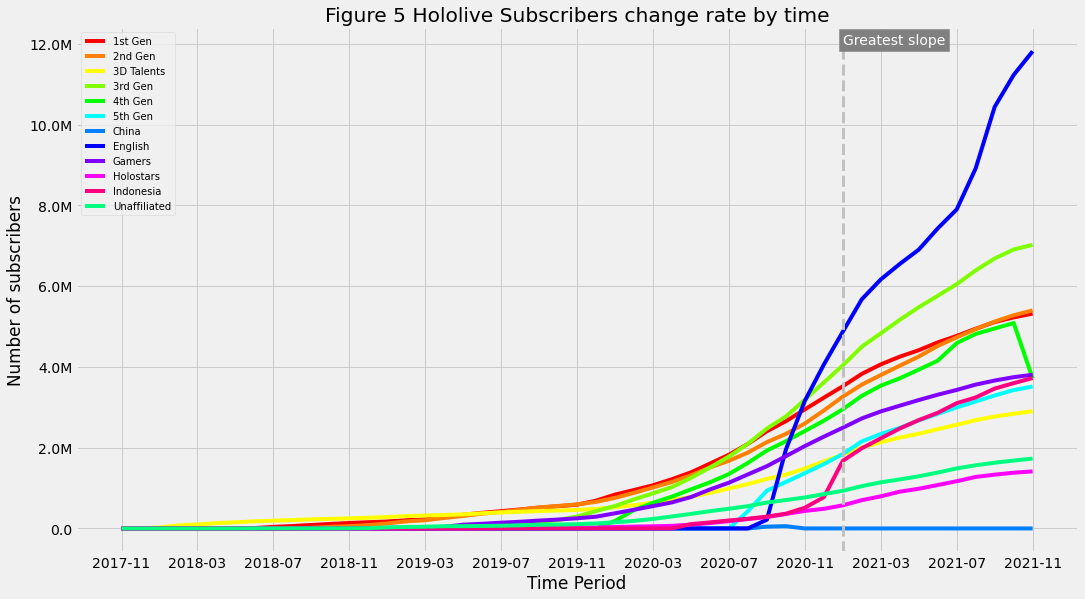

In [28]:
colors = ['#ff0000', '#ff8000', '#ffff00', '#80ff00', '#00ff00', '#00ffff', '#0080ff', '#0000ff', '#8000ff', '#ff00ff', '#ff0080', '#00ff80']
ind = 0
for i in holo_time.columns[1:]:
    plt.plot(time_period, holo_time[i], label = i, color = colors[ind])
    ind+=1
plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(reformat_values))
plt.xticks(time_period[::4])

plt.axvline(x = time_period[max_mean_diff_ind], linestyle = '--', color = '#C1C1C1', linewidth = 3)
plt.text(
    x = time_period[max_mean_diff_ind],
    y=12*10**6,
    s="Greatest slope",
    backgroundcolor="grey",
    color = 'white',
    fontsize=14)

plt.ylabel('Number of subscribers')
plt.xlabel('Time Period')
plt.title('Figure 5 Hololive Subscribers change rate by time')
plt.legend(prop={"size":10})

Here we can see that followers rate increases dramatically in the beginning of 2021 year. There could be be several reasons, such as debut of english speaking branch or lack of animated content due to industrial restrictions because of COVID-19.

Now let's take a look about number of appearance of new VTubers per each year. Data <a href = 'Web-Scraping.ipynb'>was obtained</a> from <a href = 'https://www.youtube.com'>youtube</a> and <a href = 'https://virtual-youtuber.userlocal.jp/document/ranking?page=1'>userlocal</a>, that does track vast amount of VTubers.

In [29]:
def reg_rate_change_format1(x):
    x_list = x.split(',')
    x_list[0], x_list[1] = x_list[1], x_list[0]
    x_list[0] = x_list[0][-2:]
    return ', '.join(x_list)
vtubers_date['registration date'] = vtubers_date['registration date'].apply(reg_rate_change_format1)
vtubers_date

name registration date
0                    Gawr Gura(がうるぐら サメちゃん)            20, Q3
1                                     キズナアイ            16, Q4
2                      Mori Calliope(森カリオペ)            20, Q3
3                                     兎田ぺこら            19, Q3
4                                     戌神ころね            19, Q1
...                                     ...               ...
1992                                   朝宮ゆり            19, Q1
1993                               むむいみ・あにも            20, Q4
1994                                  月ノ輪乃愛            20, Q1
1995  依音伽音-IONKANON- / project Little Lindo            20, Q2
1996                               ツクモちゃんねる            18, Q1

[1763 rows x 2 columns]

Text(0.5, 1.0, 'Figure 5.2 Number of VTubers registrations per year quarters')

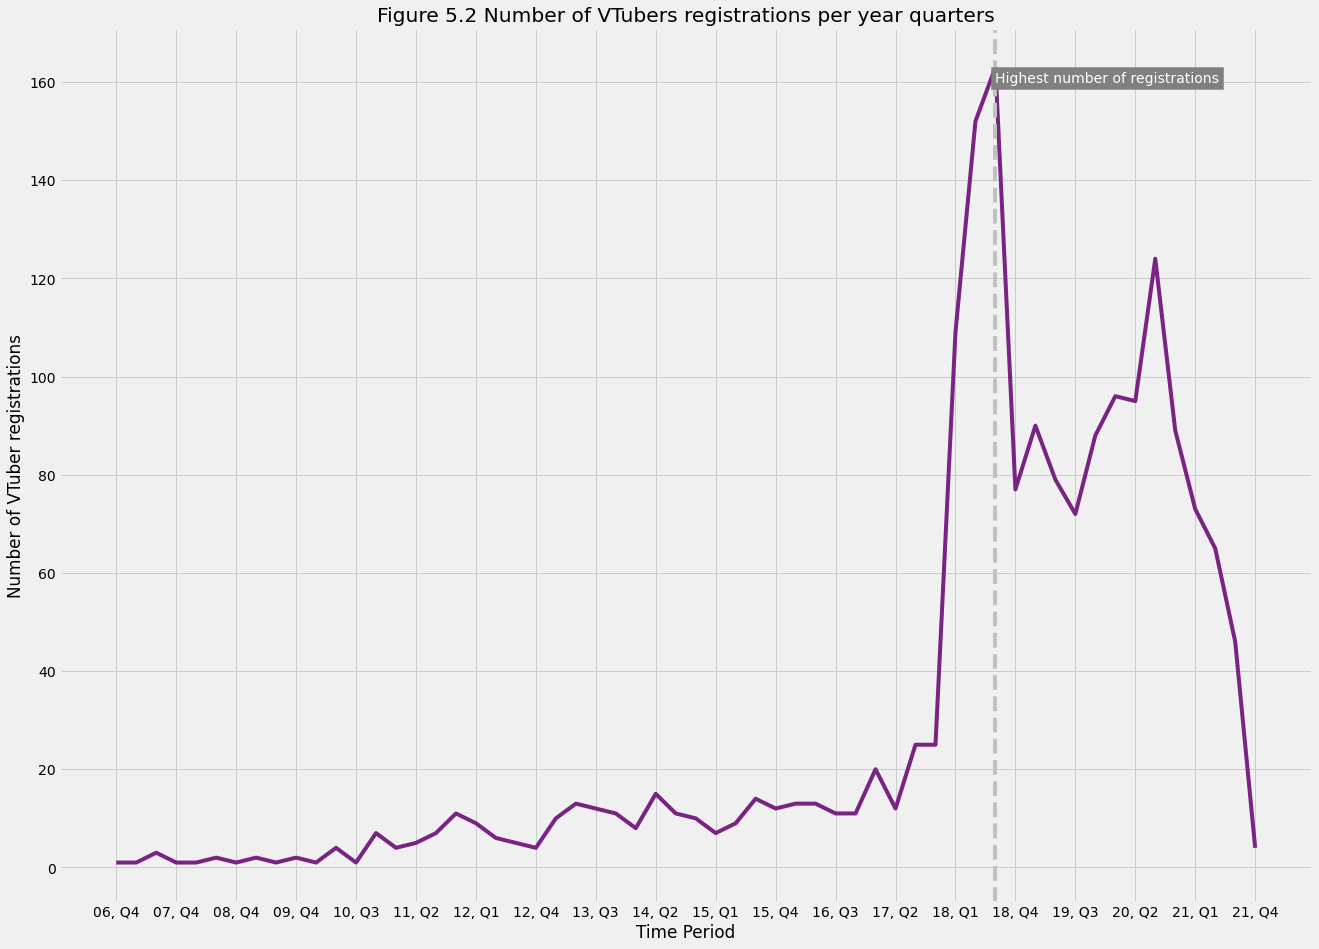

In [30]:
vtubers_reg_rate = vtubers_date.groupby('registration date').count()
year_ind = list(vtubers_reg_rate['name']).index(vtubers_reg_rate['name'].max())


plt.figure(figsize = (20, 15))
plt.plot(vtubers_reg_rate.index, vtubers_reg_rate['name'], color = '#792383')
plt.xticks(vtubers_reg_rate.index[::3])
plt.axvline(vtubers_reg_rate.index[year_ind], color = '#C1C1C1', linestyle = '--')
plt.text(
    x = vtubers_reg_rate.index[year_ind],
    y=160,
    s="Highest number of registrations",
    backgroundcolor="grey",
    color = 'white',
    fontsize=14)
plt.xlabel('Time Period')
plt.ylabel('Number of VTuber registrations')
plt.title('Figure 5.2 Number of VTubers registrations per year quarters')

Here we do have some interesting statistics: On the figure 5.2 we can see two spikes, highest of which falls on the second half of 2018. Second spike's timestamp(end of 2020 - beginning of 2021) matches with Hololive's subscribers growth and COVID-19 quarantine measures from previous chart

## [5. Conclusion](#5.-Conclusion)

Based on the analysis we could conclude several assumptions about VTubers industry

* VTuber industry is very popular and is still gaining populatity, increasing number of new VTubers
* VTuber industry is very profitable, but it's profit depends on streamer's group membership
* Modern VTubers are being ruled only by several giant agencies, which means lack of rivalry
* VTubers popularity increased drastically during COVID-19 quarantine